In [1]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.9/450.9 kB 8.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


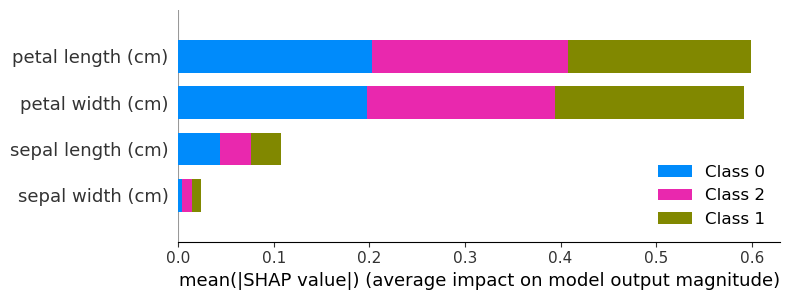

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for the first prediction in the test set
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [2]:
''' We use the Adult Income dataset (often referred to as the "Census Income" dataset).  
This dataset is commonly used for studying bias in machine learning models, as it includes 
attributes like gender and race, which can lead to biased predictions. '''

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import shap

# Load the dataset (change the path to the dataset's location)
path = "/Users/reza/EVERYTHING/Work/ML Book/Codes/Ch16/adult.data.txt"

columns = ["Age", "Workclass", "Final-Weight", "Education", "Education-Num", "Marital Status",
           "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
           "Hours per week", "Country", "Target"]

data = pd.read_csv(path, names=columns, sep=',\s', na_values=["?"], engine='python')

# Preprocess the data
data.dropna(inplace=True)
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Split the dataset
X = data.drop("Target", axis=1)
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sample data to make the SHAP process faster
shap_sample = shap.sample(X_test, 100) # Adjust the sample size as needed
shap_values = explainer.shap_values(shap_sample)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer with the trained model
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for a sample of the test data
shap_sample = shap.sample(X_test, 100)  # Adjust the sample size as needed
shap_values = explainer(shap_sample)  # This will create an Explanation object


# For binary classification, SHAP returns a list of two arrays: [shap_values_negative, shap_values_positive]
# Select the SHAP values for the positive class (or negative class if that's your focus)
shap_values_positive_class = shap_values[...,1]  # Change 1 to 0 for negative class

# Now plot the SHAP values for a specific instance
# Assuming you want to plot for the first instance in your shap_sample
shap.plots.waterfall(shap_values_positive_class[1])

NameError: name 'explainer' is not defined

In [ ]:
shap_values_positive_class = shap_values[...,0]
shap.plots.waterfall(shap_values_positive_class[1])


In [1]:
# We are dealing with a binary classification

# Extract SHAP values for one class (e.g., the positive class)
shap_values_positive_class = shap_values[...,1]  # Change 1 to 0 for the negative class

# Now plot the SHAP values using the beeswarm plot for the selected class
shap.plots.beeswarm(shap_values_positive_class)


NameError: name 'shap_values' is not defined

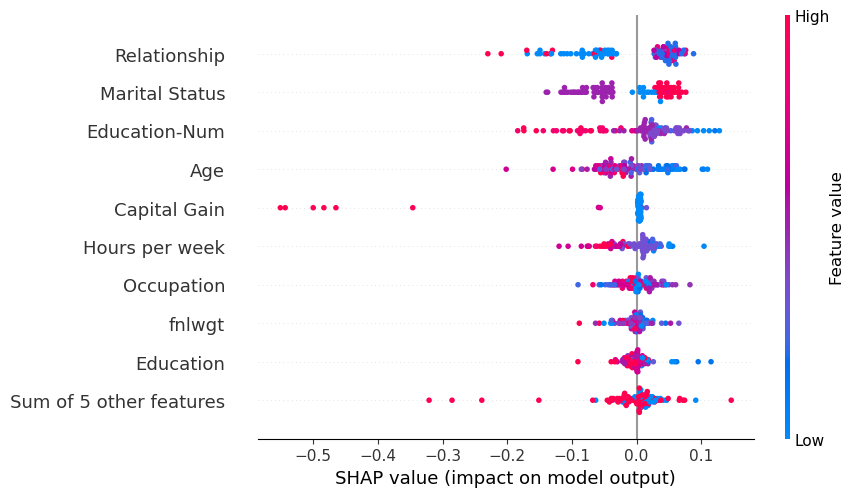

In [24]:
shap_values_negative_class = shap_values[...,0]  # Change 1 to 0 for the negative class

# Now plot the SHAP values using the beeswarm plot for the selected class
shap.plots.beeswarm(shap_values_negative_class)

In [1]:
! pip install scikit-learn lime matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=00b7a8cef01e56e336d21c4b3fd4eb03827eac8fcd4f855f24a717cec1b0a3ae
  Stored in directory: /Users/reza/Library/Caches/pip/wheels/ac/fc/ba/bc2e218408e730b7ad32dc45fbaa1ae6f0ab314e581101bdff
Successfully built lime


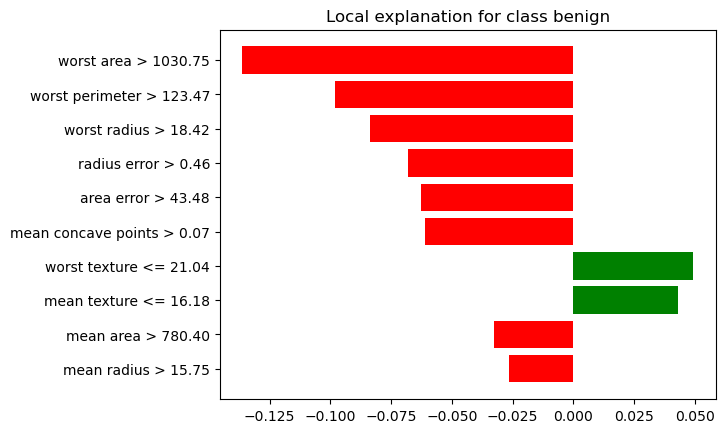

In [15]:
import lime
import lime.lime_tabular
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
class_names = cancer.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Choose an instance to explain
instance_index = 7
instance = X_test[instance_index]

# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train, 
    feature_names=feature_names, 
    class_names=class_names, 
    mode='classification'
)

# Generate explanation for the chosen instance
exp = explainer.explain_instance(
    data_row=instance, 
    predict_fn=rf.predict_proba
)

# Visualize the explanation
exp.as_pyplot_figure()
plt.show()


Actual values for the instance:
mean radius: 17.57
mean texture: 15.05
mean perimeter: 115.0
mean area: 955.1
mean smoothness: 0.09847
mean compactness: 0.1157
mean concavity: 0.09875
mean concave points: 0.07953
mean symmetry: 0.1739
mean fractal dimension: 0.06149
radius error: 0.6003
texture error: 0.8225
perimeter error: 4.655
area error: 61.1
smoothness error: 0.005627
compactness error: 0.03033
concavity error: 0.03407
concave points error: 0.01354
symmetry error: 0.01925
fractal dimension error: 0.003742
worst radius: 20.01
worst texture: 19.52
worst perimeter: 134.9
worst area: 1227.0
worst smoothness: 0.1255
worst compactness: 0.2812
worst concavity: 0.2489
worst concave points: 0.1456
worst symmetry: 0.2756
worst fractal dimension: 0.07919


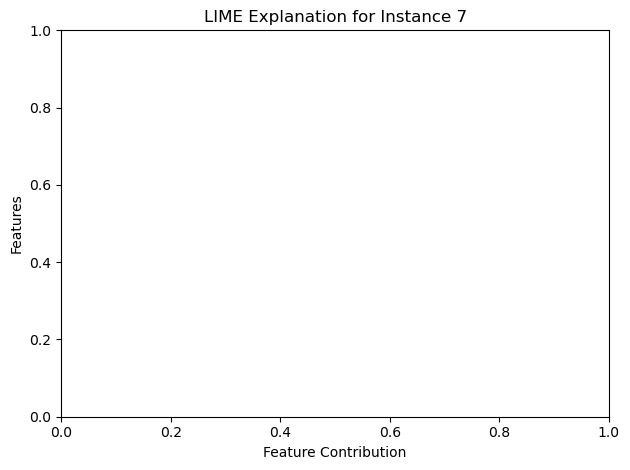

In [14]:
import lime
import lime.lime_tabular
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
class_names = cancer.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Choose an instance to explain
instance_index = 7 #########3
instance = X_test[instance_index]

# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train, 
    feature_names=feature_names, 
    class_names=class_names, 
    mode='classification'
)

# Generate explanation for the chosen instance
exp = explainer.explain_instance(
    data_row=instance, 
    predict_fn=rf.predict_proba
)

# Visualize the explanation
fig, ax = plt.subplots()
exp.show_in_notebook(show_table=False, show_all=False)
ax.set_title(f'LIME Explanation for Instance {instance_index}')
ax.set_xlabel('Feature Contribution')
ax.set_ylabel('Features')
plt.tight_layout()

# Print actual values of the instance for context
print("Actual values for the instance:")
for feature, value in zip(feature_names, instance):
    print(f"{feature}: {value}")

plt.show()
